## The ``merge`` function
Let's experiment with the ``merge`` function.

In [2]:
import pandas as pd
fruit_data = [["apple", 5, "red"], ["banana", 6, "yellow"], ["blueberry", 9, "blue"], ["mango", 5, "orange"]]
fruits_df = pd.DataFrame(fruit_data, columns=["Name", "Name length", "Colour"])
fruits_df

,Name,Name length,Colour
0,apple,5,red
1,banana,6,yellow
2,blueberry,9,blue
3,mango,5,orange


In [3]:
fruit_alt_data = [["apple", "green"], ["banana", "brown"], ["blueberry", "purple"], ["mango", "green"]]
fruits_alt_df = pd.DataFrame(fruit_alt_data, columns = ["Name", "Alt Colour"])
fruits_alt_df

,Name,Alt Colour
0,apple,green
1,banana,brown
2,blueberry,purple
3,mango,green


In [4]:
fruits_merged_df = pd.merge(fruits_df, fruits_alt_df, on="Name")
fruits_merged_df

,Name,Name length,Colour,Alt Colour
0,apple,5,red,green
1,banana,6,yellow,brown
2,blueberry,9,blue,purple
3,mango,5,orange,green


What happens if we add extra rows??

In [5]:
fruits_alt_data = [["apple", "green"], ["banana", "brown"], ["blueberry", "purple"],
                   ["mango", "green"],["avocado", "brown"], ["grape", "green"]]
                   
fruits_alt_df = pd.DataFrame(fruits_alt_data, columns = ["Name", "Alt Colour"])
fruits_alt_df

,Name,Alt Colour
0,apple,green
1,banana,brown
2,blueberry,purple
3,mango,green
4,avocado,brown
5,grape,green


In [6]:
fruits_merged_df = pd.merge(fruits_df, fruits_alt_df, on="Name")
fruits_merged_df

,Name,Name length,Colour,Alt Colour
0,apple,5,red,green
1,banana,6,yellow,brown
2,blueberry,9,blue,purple
3,mango,5,orange,green


What happened to the extra rows that were added?

If we check the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html), we see that we can input extra parameters, such as the "how" argument. Try them to see how they work!

In [ ]:
fruits_merged_df = pd.merge(fruits_df, fruits_alt_df, on="Name", how="outer")
fruits_merged_df

In [ ]:
fruits_merged_df = pd.merge(fruits_df, fruits_alt_df, how="cross")
fruits_merged_df

## The ``.groupby()`` method
Now let's work with a real example. 

In [8]:
import pandas as pd

checkouts_df = pd.read_csv('seattle_checkouts.csv')

Let's try to find the creators whose works were checked out the most in April 2020. 

In [8]:
#Why does this not accurately portray the creators whose works were checked out the most?
checkouts_df['Creator'].value_counts()[:20]

James Patterson              370
Daisy Meadows                219
Agatha Christie              211
Gertrude  Chandler Warner    174
Geronimo Stilton             172
Mary Pope Osborne            170
Stephen King                 168
Louis L'Amour                167
Nora Roberts                 158
Erin Hunter                  152
Dan Gutman                   147
M. C. Beaton                 144
Stuart Woods                 144
Stan Berenstain              136
DK                           131
Robert B. Parker             120
Janet Evanovich              116
Clive Cussler                116
J. A. Jance                  112
Debbie Macomber              111
Name: Creator, dtype: int64

We can use the ``.groupby()`` and ``.sum()`` method

In [9]:
checkouts_grouped_summed_df = checkouts_df.groupby(['Creator']).sum(numeric_only=True)
checkouts_grouped_summed_df[:20]

,CheckoutYear,CheckoutMonth,Checkouts
Creator,,,
(法)凡尔纳,2020,4,1
50 Cent,6060,12,4
A'Lelia Bundles,4040,8,10
A. A. Aguirre,2020,4,1
A. A. Milne,26260,52,48
A. Alpheus,2020,4,1
A. B. Greenfield,2020,4,1
A. B. Jewell,2020,4,4
A. Birnbaum,2020,4,1


In [14]:
checkouts_grouped_summed_df[["Checkouts"]].nlargest(20, columns="Checkouts")

,Checkouts
Creator,
J. K. Rowling,3877
James Patterson,1711
David Baldacci,1449
Michael Connelly,1367
Agatha Christie,1362
Stephen King,1271
Lee Child,1264
John Grisham,1154
Kevin Kwan,1153


Make a chart!

<AxesSubplot: title={'center': '10 Most Checked-Out Creators'}, xlabel='Creator'>

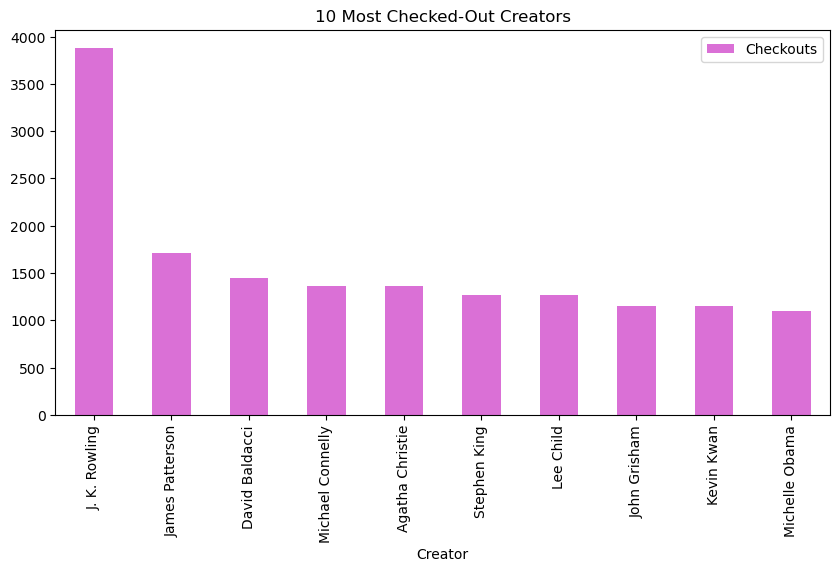

In [10]:
checkouts_grouped_summed_df[["Checkouts"]].nlargest(10, columns="Checkouts").plot(kind='bar', figsize=(10, 5), title='10 Most Checked-Out Creators', color=["orchid"])

## Grouping multiple columns

We can also try to compare statistics for different periods of time. 

``seattle_checkouts_2020.csv`` contains all the checkout data over 2020.

In [11]:
import pandas as pd
checkouts2020_df = pd.read_csv('seattle_checkouts_2020.csv')
checkouts2020_df

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,BOOK,2020,8,1,Harvest / Sam Inglis.,NaN,"Inglis, Sam",Young Neil 1945 Harvest,"Continuum,",2003.
1,Digital,OverDrive,EBOOK,2020,8,1,The Race Beat,NaN,Gene Roberts,"History, Nonfiction, Politics, Sociology","Random House, Inc.",2008
2,Digital,OverDrive,EBOOK,2020,8,5,I Can Cook Vegan,NaN,Isa Chandra Moskowitz,"Cooking & Food, Nonfiction",ABRAMS,2019
3,Digital,OverDrive,EBOOK,2020,8,1,Follow the Stars Home,NaN,Luanne Rice,"Fiction, Romance","Random House, Inc.",2012
4,Digital,OverDrive,EBOOK,2020,8,1,Blood of Innocence,NaN,Tami Dane,"Fantasy, Fiction, Romance",Lightning Source Inc,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
1721371,Digital,OverDrive,EBOOK,2020,12,4,Blueberries for Sal,NaN,Robert McCloskey,"Juvenile Fiction, Juvenile Literature, Picture...","Penguin Group (USA), Inc.",2014
1721372,Physical,Horizon,BOOK,2020,12,1,Squad / Mariah MacCarthy.,NaN,"MacCarthy, Mariah","Cheerleading Juvenile fiction, Best friends Ju...","Farrar Straus Giroux,",2019.
1721373,Physical,Horizon,BOOK,2020,12,2,Out of this world : poems and facts about spac...,NaN,"Sklansky, Amy E.","Outer space Juvenile poetry, Outer space Juven...","Alfred A. Knopf,",[2012]
1721374,Physical,Horizon,BOOK,2020,12,5,"Ring shout : or, Hunting Ku Kluxes in the end ...",NaN,"Clark, P. Djèlí","Ku Klux Klan 1915 Fiction, African Americans G...","Tordotcom,",2020.


In [ ]:
checkouts2020_df.groupby(["CheckoutMonth", "MaterialType"])

In [ ]:
checkouts2020_df.groupby(["CheckoutMonth", "MaterialType"]).size()

In [2]:
checkouts2020_df.groupby(["CheckoutMonth", "MaterialType"]).size().unstack(fill_value=0)

MaterialType,ATLAS,AUDIOBOOK,BOOK,CR,EBOOK,ER,"ER, NONPROJGRAPH","ER, PRINT","ER, SOUNDDISC","ER, VIDEODISC",...,"SOUNDDISC, VIDEOCASS","SOUNDDISC, VIDEODISC",SOUNDREC,UNSPECIFIED,VIDEO,VIDEOCART,VIDEOCASS,VIDEODISC,VIDEOREC,VISUAL
CheckoutMonth,,,,,,,,,,,,,,,,,,,,,
1,13,25307,103645,89,55642,67,1,0,31,25,...,0,145,83,5,148,2,6,18888,1,10
2,19,25202,100713,71,54846,64,1,1,46,21,...,0,153,52,5,115,2,4,18837,1,9
3,17,25559,84689,51,62678,42,1,1,34,17,...,0,103,64,5,151,2,4,16375,1,7
4,0,25810,66,0,67548,0,0,0,0,0,...,0,0,0,0,236,0,0,4,0,0
5,0,26588,87,0,68724,0,0,0,0,0,...,0,0,0,0,177,0,0,3,0,0
6,0,26198,42,0,67079,0,0,0,0,0,...,0,0,0,0,173,0,0,4,0,0
7,0,27381,50,0,67741,0,0,0,0,0,...,0,0,0,0,135,0,0,12,0,0
8,0,27377,6579,2,67137,5,0,0,2,3,...,0,10,2,1,155,0,0,1994,0,1
9,9,26958,35899,10,66292,20,0,1,16,10,...,0,41,20,2,195,0,0,6389,1,3


In [4]:
#Assign the new table to a variable so we can work with it:
checkout_types_per_month_df = checkouts2020_df.groupby(["CheckoutMonth", "MaterialType"]).size().unstack(fill_value=0)

In [5]:
#Isolate the most relevant columns:
checkout_types_per_month_df[["AUDIOBOOK", "EBOOK", "BOOK","VIDEODISC"]]

MaterialType,AUDIOBOOK,EBOOK,BOOK,VIDEODISC
CheckoutMonth,,,,
1,25307,55642,103645,18888
2,25202,54846,100713,18837
3,25559,62678,84689,16375
4,25810,67548,66,4
5,26588,68724,87,3
6,26198,67079,42,4
7,27381,67741,50,12
8,27377,67137,6579,1994
9,26958,66292,35899,6389


<AxesSubplot: title={'center': 'Checkouts'}, xlabel='CheckoutMonth'>

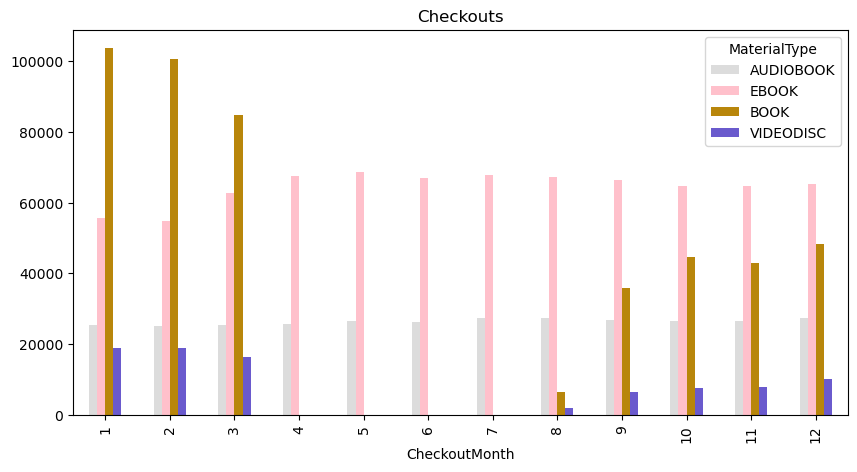

In [14]:
#Make a chart!
checkout_types_per_month_df[["AUDIOBOOK", "EBOOK", "BOOK","VIDEODISC"]].plot(kind='bar', figsize=(10, 5), title='Checkouts', color=["gainsboro", "pink", "darkgoldenrod", "slateblue", "mediumpurple"])

**Chart colours**

Named colors:
https://matplotlib.org/stable/gallery/color/named_colors.html

You can also use hex codes, e.g. `'#fa8702'`
https://htmlcolorcodes.com/